# 拉东变换 Radon Transform 
在笛卡尔坐标系中，一条直线可由其斜截式 $ y = ax + b$。由其法线表示法
$$
    xcos\theta + ycos\theta = \rho
$$

投影剖面中坐标$(\rho_{j} , \theta_{k})$ 的人任意一点，由沿直线 $xcos\theta + ycos\theta = \rho$的射线和给出。处理连续变量时，射线和是一个线积分，即：
$$
    g(\rho_j,\theta_k) = \int_{-\infty}^{\infty}\int_{-\infty}^{\infty} f(x,y)\sigma(xcos\theta_k + ysin\theta_k - \rho) dxdy
$$

在离散情况下:
$$
 g(\rho,\theta) = \sum_{x=0}^{M-1}\sum_{y=0}^{N-1}f(x,y)\sigma(xcos\theta + ysin\theta - \rho)
 $$

In [4]:
import numpy as np 
from scipy import ndimage
from matplotlib import pyplot as plt 

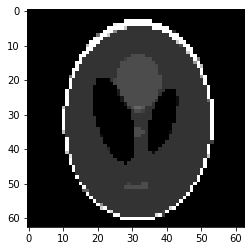

In [5]:
f = plt.imread("./sheep-logan-phantom.tif")

plt.imshow(f , "gray") 

In [6]:
delta_rho = 1
def dirac(val):
    if val < 0.0001:
        return 1 
    else: 
        return 0
"""
f 输入图像

"""
def radon(image, steps ):
    channels = len(image[0])
    res = np.zeros((channels, channels), dtype='float64')
    for s in range(steps):
        rotation = ndimage.rotate(image, -s*180/steps, reshape=False).astype('float64')        
        res[:,s] = sum(rotation)
    return res




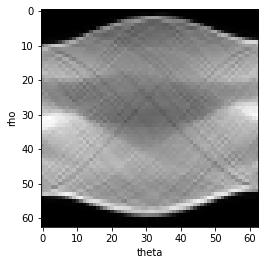

In [7]:
l = len(f[0])
g = radon(f,l)
plt.xlabel("theta")
plt.ylabel("rho")
plt.imshow(g,"gray")

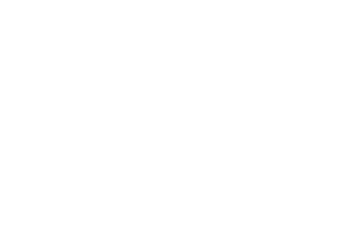

In [9]:
plt.axis("off")
plt.imsave("./radon.png",g,cmap='gray')